## Lab 7 z Podstaw Uczenia Maszynowego - Neuron
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

In [88]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time
from collections import defaultdict 

import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1])), 4)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1])), 4)

def plot_class(X_syn_test, y_syn_test, model, method):
        X_pred_0 = X_syn_test[y_syn_test == 0]
        X_pred_1 = X_syn_test[y_syn_test == 1]
        x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
        y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.2)
        plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
        plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
        plt.title(f'Powierzchnia decyzyjna {method}')
        plt.xlabel('Cecha 1')
        plt.ylabel('Cecha 2')
        plt.legend()

def pred_info(y_test, y_pred, name_of_method):
    accuracy = accuracy_score(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)
    print(f'\n{name_of_method}:')
    print(f'Macierz pomylek: \n{c_matrix}')
    print(f'Dokladnosc: {accuracy}\nCzulosc: {sensitivity(c_matrix)}\nSwoistosc: {specificity(c_matrix)}')

In [4]:
class MNeuron:
    def __init__(self, eta=0.001, num_iterations=100, actv_func = 'logistic'):
        self.ETA = eta
        self.NUM_ITERATIONS = num_iterations
        self.theta = None
        self.y_pred_prob = None
        self.EPSILON = 0.01
        self.actv_func = actv_func
        

    def fit(self, X, y):
        _, num_features = X.shape
        self.theta = np.zeros(num_features)
        

        for i in range(self.NUM_ITERATIONS):
            linear_model = X @ self.theta
            y_predicted = self.activation_function(linear_model)
            

            epsilon = (y_predicted - y)
            dw = (epsilon * self.derivative_function(linear_model)) @ X
            self.theta -= self.ETA * dw
            if abs(statistics.mean(epsilon)) < self.EPSILON:
                break

    def predict(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.activation_function(linear_model)
        self.y_pred_prob = y_predicted_prob
        # print(f'y_pred: {y_predicted_prob}')
        if self.actv_func in ['sin', 'tanh', 'ReLu', 'lRelu']:
            y_predicted = [1 if i > 0 else 0 for i in y_predicted_prob]
        else:
            y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_prob]
        return np.array(y_predicted)
    
    def decision_function(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.activation_function(linear_model)
        return np.array(y_predicted_prob)

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


    def logistic_activation(self, X):
        return 1 / (1 + np.exp(-X))
    def logistic_deriv(self, X):
        y = self.logistic_activation(X)
        return y * (1-y)
    
    
    def heaviside_activation(self, X):
        return np.where(X >= 0, 1, 0)
    def heaviside_deriv(self, X):
        return 1


    def sin_activation(self,X):
        return np.sin(X)
    def sin_deriv(self, X):
        return np.cos(X)


    def tanh_activation(self, X):
        return np.tanh(X)
    def tanh_deriv(self, X):
        return (1/(np.cosh(X)))**2


    def sign_activation(self, X):
        return np.where(X>=0, 1, -1)
    def sign_deriv(self, X):
        return 1

    
    def ReLu_activation(self, X):
        return np.maximum(0, X)
    def ReLu_deriv(self, X):
        return np.where(X >= 0, 1, 0)

    
    def lReLu_activation(self, X):
        return np.where(X > 0, X, 0.01*X)
    def lReLu_deriv(self, X):
        return np.where(X > 0, 1, 0.01)

    
    def activation_function(self, X):
        if self.actv_func == 'logistic':
            return self.logistic_activation(X)
        
        elif self.actv_func == 'heaviside':
            return self.heaviside_activation(X)
        
        elif self.actv_func == 'sin':
            return self.sin_activation(X)
        
        elif self.actv_func == 'tanh':
            return self.tanh_activation(X)
        
        elif self.actv_func == 'sign':
            return self.sign_activation(X)
        
        elif self.actv_func == 'ReLu':
            return self.ReLu_activation(X)
        
        elif self.actv_func == 'lReLu':
            return self.lReLu_activation(X)
        
        else:
            raise ValueError('Activation not supported')
        
    def derivative_function(self, X):
        if self.actv_func == 'logistic':
            return self.logistic_deriv(X)
        
        elif self.actv_func == 'heaviside':
            return self.heaviside_deriv(X)
        
        elif self.actv_func == 'sin':
            return self.sin_deriv(X)
        
        elif self.actv_func == 'tanh':
            return self.tanh_deriv(X)
        
        elif self.actv_func == 'sign':
            return self.sign_deriv(X)
        
        elif self.actv_func == 'ReLu':
            return self.ReLu_deriv(X)
        
        elif self.actv_func == 'lReLu':
            return self.lReLu_deriv(X)
        
        else:
            raise ValueError('Activation not supported')
        

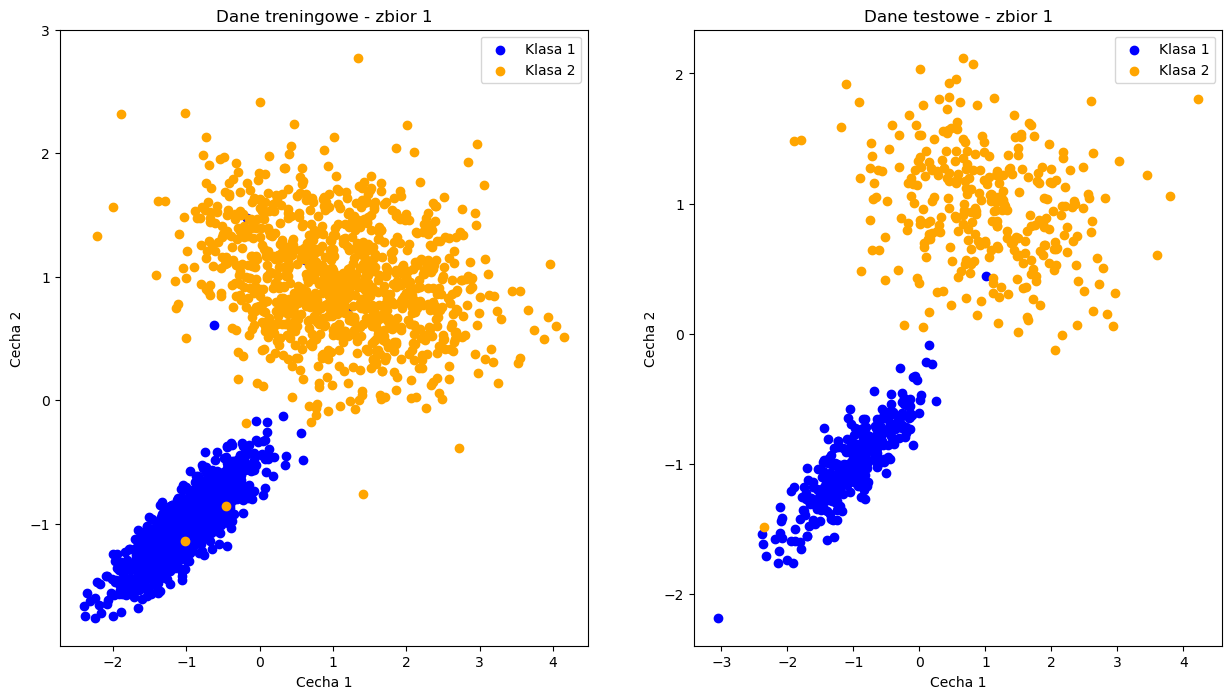

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=2, n_clusters_per_class=1, n_redundant=0, random_state=254397)
#Podzial na podzbiory
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X, t, test_size=0.25, random_state=254397)


# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_syn_train[(y_syn_train == 0)]
klasa_1_train = X_syn_train[(y_syn_train == 1)]
klasa_0_test = X_syn_test[(y_syn_test == 0)]
klasa_1_test = X_syn_test[(y_syn_test == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

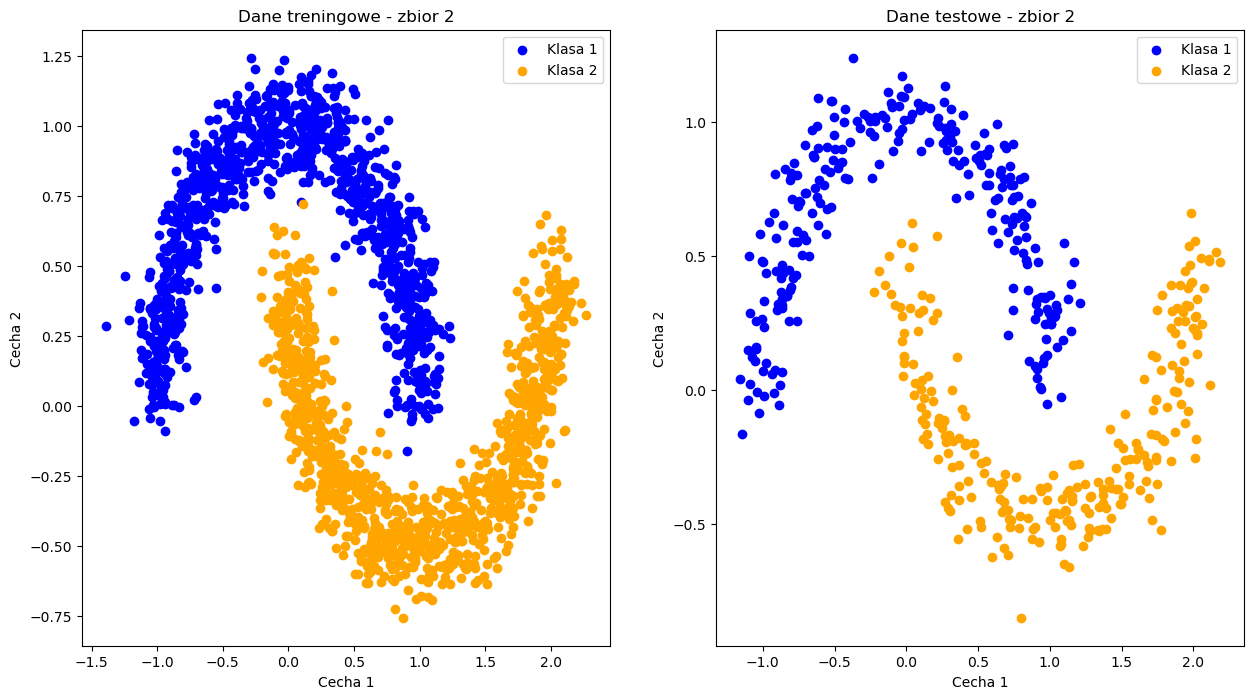

In [6]:
from sklearn.datasets import make_moons
# Dane wejsciowe
X_m, t_m = make_moons(n_samples=2597, random_state=254397, noise=0.1)

#Podzial na podzbiory
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_m, t_m, test_size=.2, random_state=254397)

# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train_M = X_train_M[(y_train_M == 0)]
klasa_1_train_M = X_train_M[(y_train_M == 1)]
klasa_0_test_M = X_test_M[(y_test_M == 0)]
klasa_1_test_M = X_test_M[(y_test_M == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train_M[:,0], klasa_0_train_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train_M[:,0], klasa_1_train_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test_M[:,0], klasa_0_test_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test_M[:,0], klasa_1_test_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay

def neuron_custom(X_train, X_test, y_train, y_test, method):
    model = MNeuron(eta=0.001, num_iterations=100, actv_func=method)
    model.fit(X_train, y_train)
    start = time.time()
    for i in range(100):
        y_pred = model.predict(X_test)
    end = time.time()
    print(f'Sredni czas metody {method}: {(end - start)/100} s')
    pred_info(y_test, y_pred, method)
    y_scores = model.decision_function(X_test)
    return model, y_pred, y_scores

Sredni czas metody logistic: 9.966135025024414e-05 s

logistic:
Macierz pomylek: 
[[333   2]
 [  7 308]]
Dokladnosc: 0.9861538461538462
Czulosc: 0.994
Swoistosc: 0.9778
Sredni czas metody heaviside: 0.0005282282829284668 s

heaviside:
Macierz pomylek: 
[[333   2]
 [  7 308]]
Dokladnosc: 0.9861538461538462
Czulosc: 0.994
Swoistosc: 0.9778
Sredni czas metody sin: 5.9802532196044925e-05 s

sin:
Macierz pomylek: 
[[334   1]
 [  2 313]]
Dokladnosc: 0.9953846153846154
Czulosc: 0.997
Swoistosc: 0.9937
Sredni czas metody tanh: 5.9802532196044925e-05 s

tanh:
Macierz pomylek: 
[[334   1]
 [  2 313]]
Dokladnosc: 0.9953846153846154
Czulosc: 0.997
Swoistosc: 0.9937
Sredni czas metody ReLu: 5.9800148010253905e-05 s

ReLu:
Macierz pomylek: 
[[334   1]
 [  1 314]]
Dokladnosc: 0.9969230769230769
Czulosc: 0.997
Swoistosc: 0.9968
Sredni czas metody sign: 0.0004584622383117676 s

sign:
Macierz pomylek: 
[[333   2]
 [  7 308]]
Dokladnosc: 0.9861538461538462
Czulosc: 0.994
Swoistosc: 0.9778
Sredni czas met

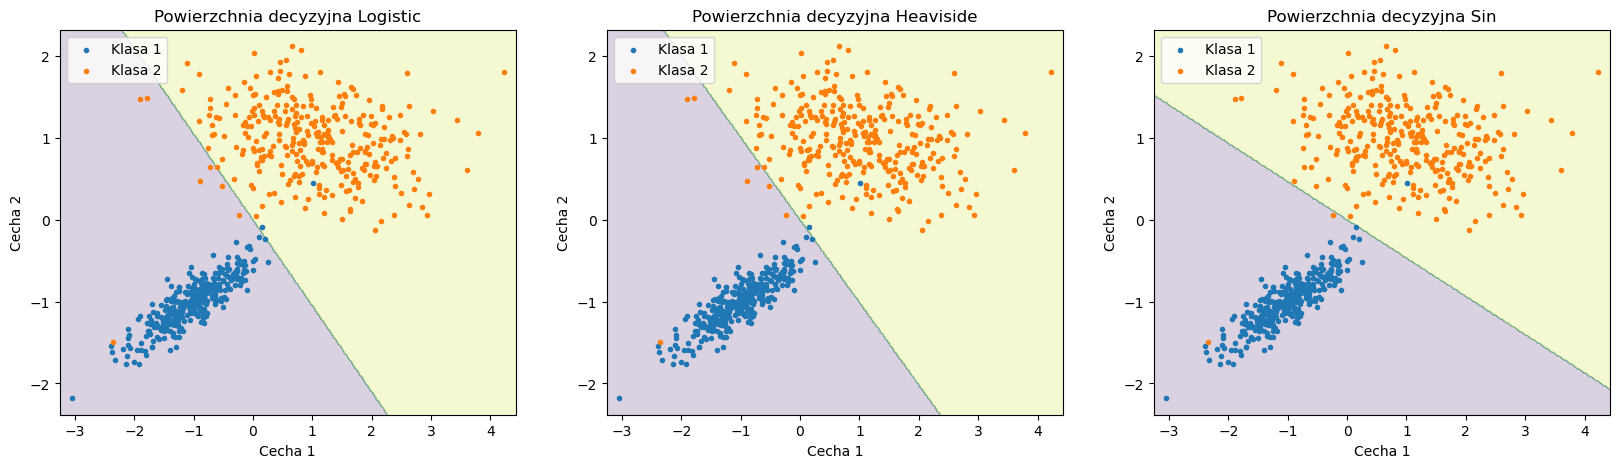

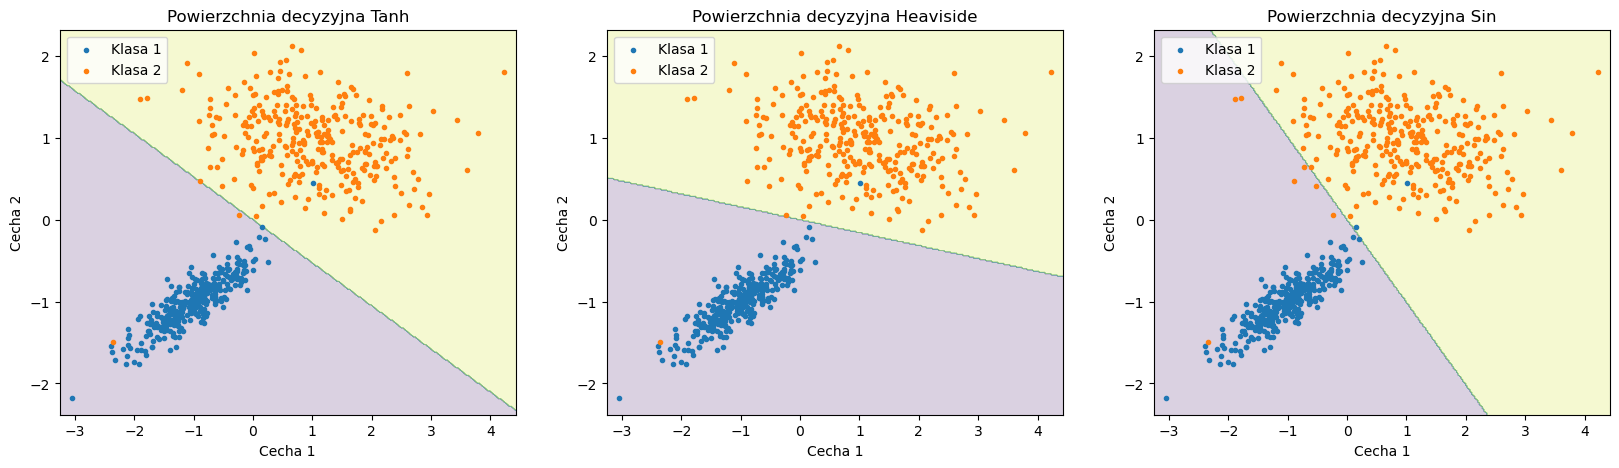

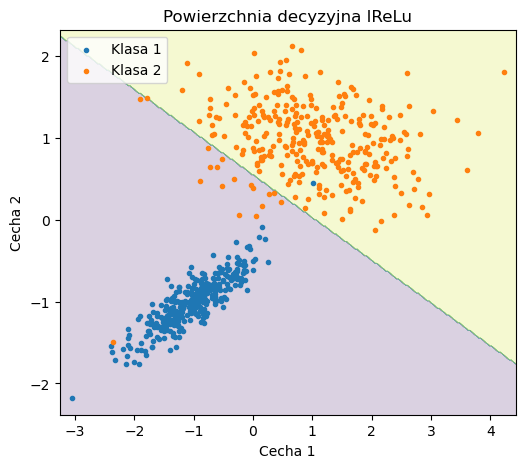

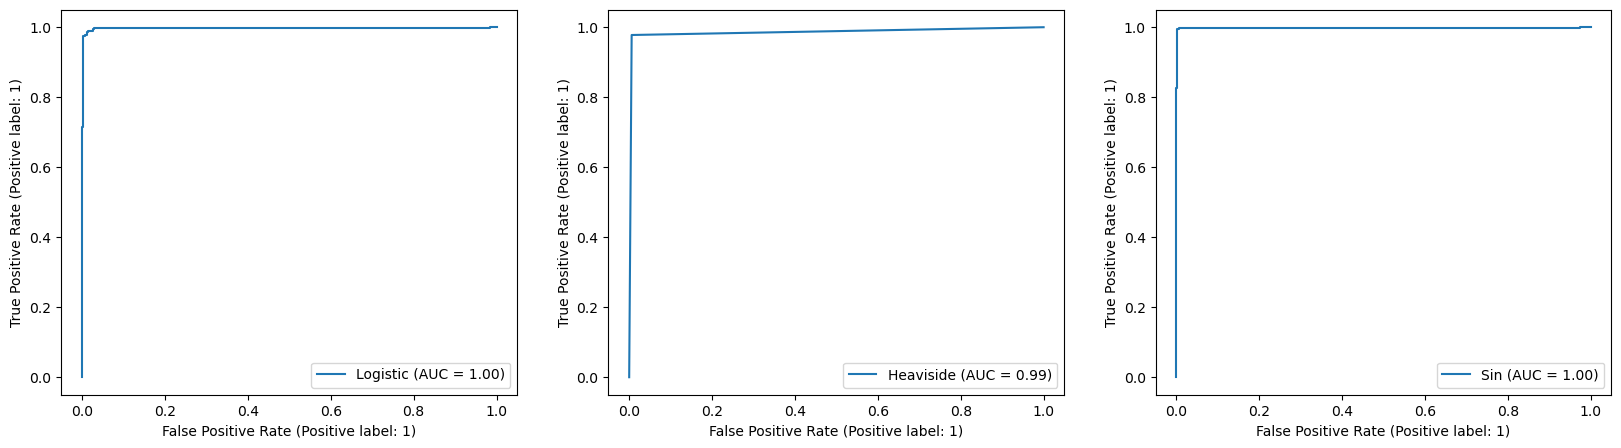

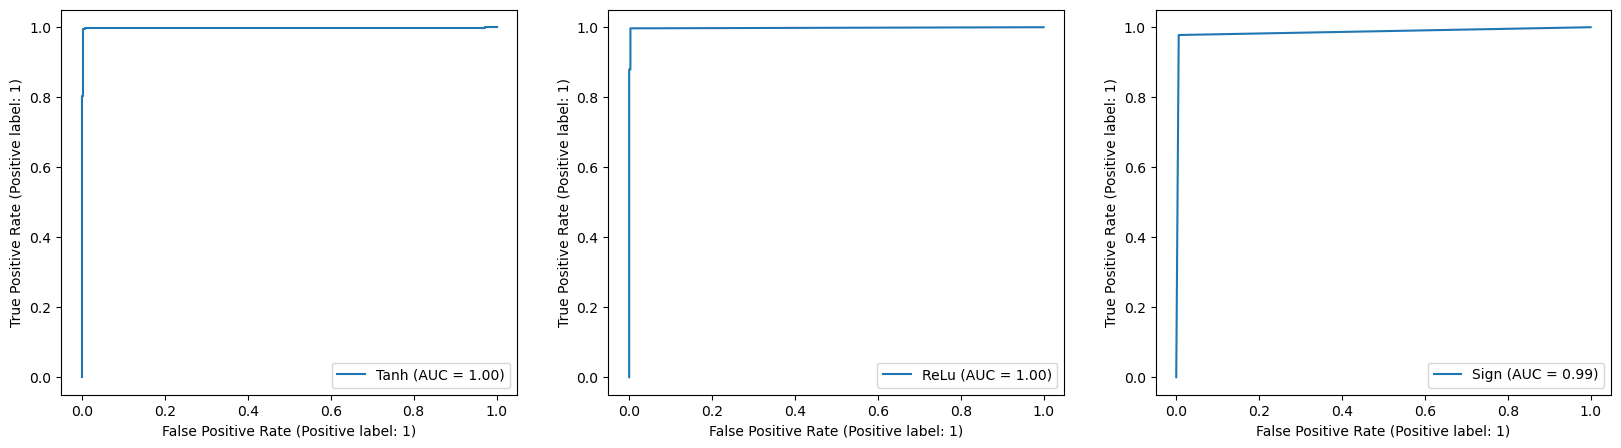

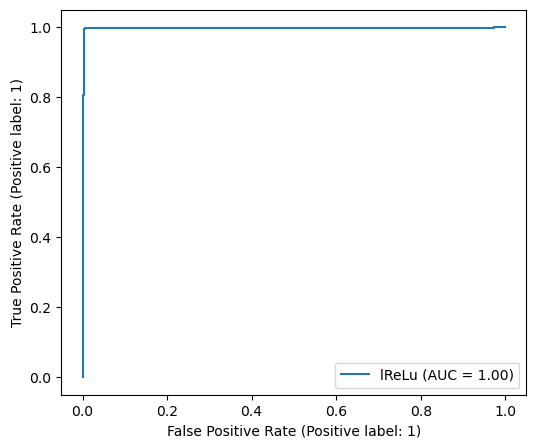

In [21]:
model_logistic, y_pred_logistic, y_scores_logistic = neuron_custom(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'logistic')
model_heaviside, y_pred_heaviside, y_scores_heaviside = neuron_custom(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'heaviside')
model_sin, y_pred_sin, y_scores_sin = neuron_custom(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'sin')
model_tanh, y_pred_tanh, y_scores_tanh = neuron_custom(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'tanh')
model_ReLu, y_pred_ReLu, y_scores_ReLu = neuron_custom(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'ReLu')
model_sign, y_pred_sign, y_scores_sign = neuron_custom(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'sign')
model_lReLu, y_pred_lReLu, y_scores_lReLu = neuron_custom(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'lReLu')

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_class(X_syn_test, y_syn_test, model_logistic, 'Logistic')
plt.subplot(1, 3, 2)
plot_class(X_syn_test, y_syn_test, model_heaviside, 'Heaviside')
plt.subplot(1, 3, 3)
plot_class(X_syn_test, y_syn_test, model_sin, 'Sin')
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_class(X_syn_test, y_syn_test, model_tanh, 'Tanh')
plt.subplot(1, 3, 2)
plot_class(X_syn_test, y_syn_test, model_ReLu, 'Heaviside')
plt.subplot(1, 3, 3)
plot_class(X_syn_test, y_syn_test, model_sign, 'Sign')
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_class(X_syn_test, y_syn_test, model_lReLu, 'lReLu')

_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_syn_test, y_scores_logistic, name='Logistic', ax=axs[0])
RocCurveDisplay.from_predictions(y_syn_test, y_scores_heaviside, name='Heaviside', ax=axs[1])
RocCurveDisplay.from_predictions(y_syn_test, y_scores_sin, name='Sin', ax=axs[2])
_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_syn_test, y_scores_tanh, name='Tanh', ax=axs[0])
RocCurveDisplay.from_predictions(y_syn_test, y_scores_ReLu, name='ReLu', ax=axs[1])
RocCurveDisplay.from_predictions(y_syn_test, y_scores_sign, name='Sign', ax=axs[2])
_, axs = plt.subplots(1, 1, figsize=(6, 5))
RocCurveDisplay.from_predictions(y_syn_test, y_scores_lReLu, name='lReLu', ax=axs)

Sredni czas metody logistic: 7.976770401000976e-05 s

logistic:
Macierz pomylek: 
[[185  79]
 [ 28 228]]
Dokladnosc: 0.7942307692307692
Czulosc: 0.7008
Swoistosc: 0.8906
Sredni czas metody heaviside: 0.00045847415924072266 s

heaviside:
Macierz pomylek: 
[[255   9]
 [ 80 176]]
Dokladnosc: 0.8288461538461539
Czulosc: 0.9659
Swoistosc: 0.6875
Sredni czas metody sin: 4.9834251403808596e-05 s

sin:
Macierz pomylek: 
[[146 118]
 [ 19 237]]
Dokladnosc: 0.7365384615384616
Czulosc: 0.553
Swoistosc: 0.9258
Sredni czas metody tanh: 4.9834251403808596e-05 s

tanh:
Macierz pomylek: 
[[146 118]
 [ 19 237]]
Dokladnosc: 0.7365384615384616
Czulosc: 0.553
Swoistosc: 0.9258
Sredni czas metody ReLu: 4.9831867218017576e-05 s

ReLu:
Macierz pomylek: 
[[222  42]
 [ 28 228]]
Dokladnosc: 0.8653846153846154
Czulosc: 0.8409
Swoistosc: 0.8906
Sredni czas metody sign: 0.00036876201629638673 s

sign:
Macierz pomylek: 
[[255   9]
 [ 80 176]]
Dokladnosc: 0.8288461538461539
Czulosc: 0.9659
Swoistosc: 0.6875
Sredni cz

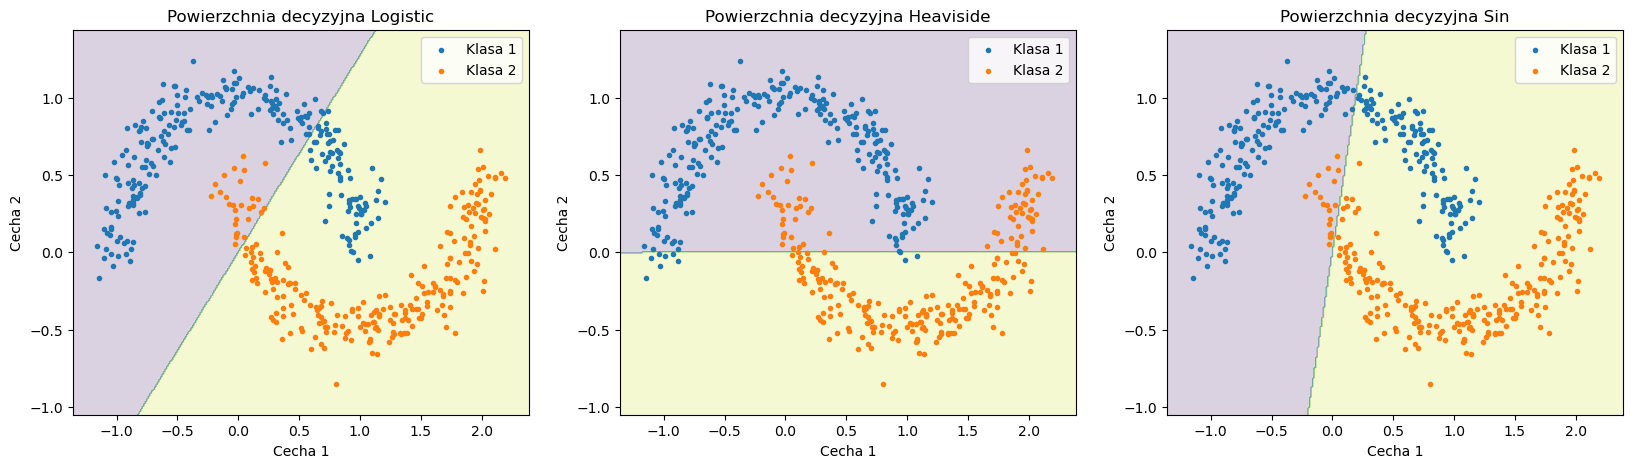

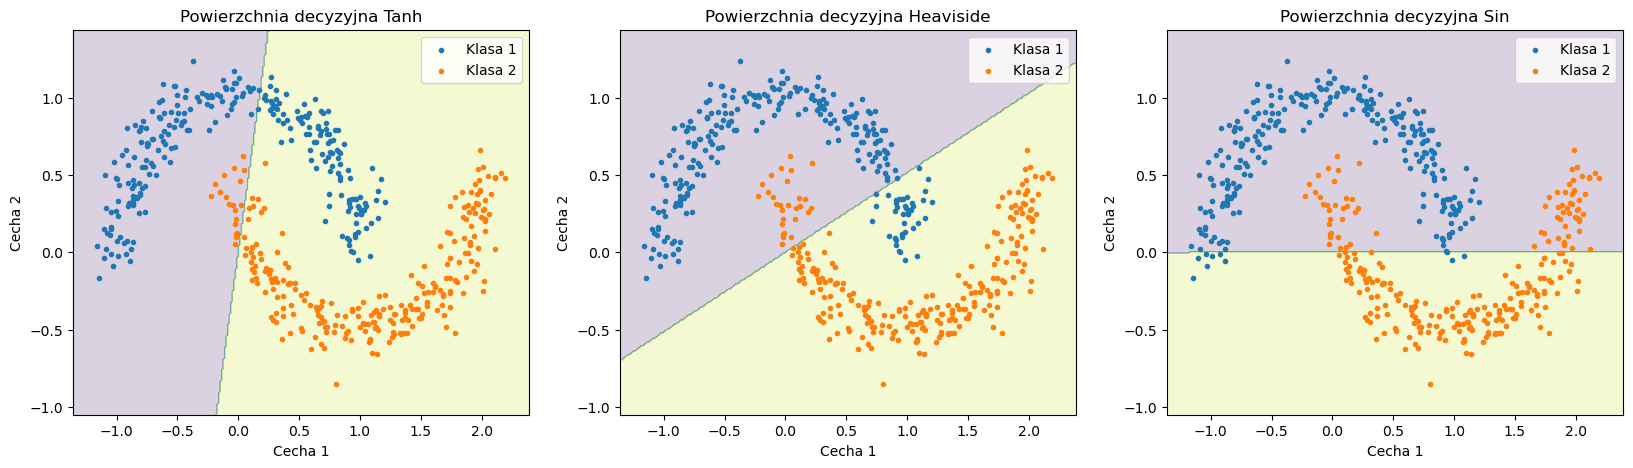

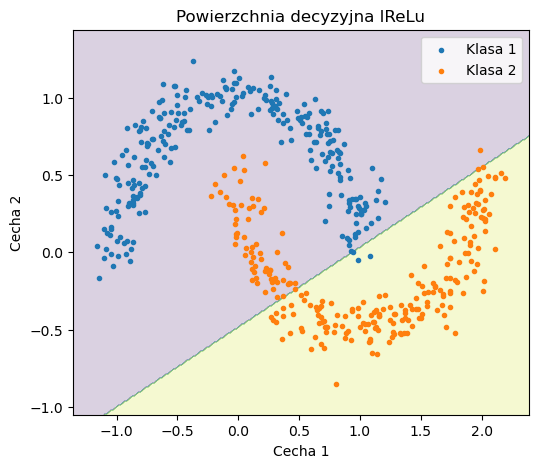

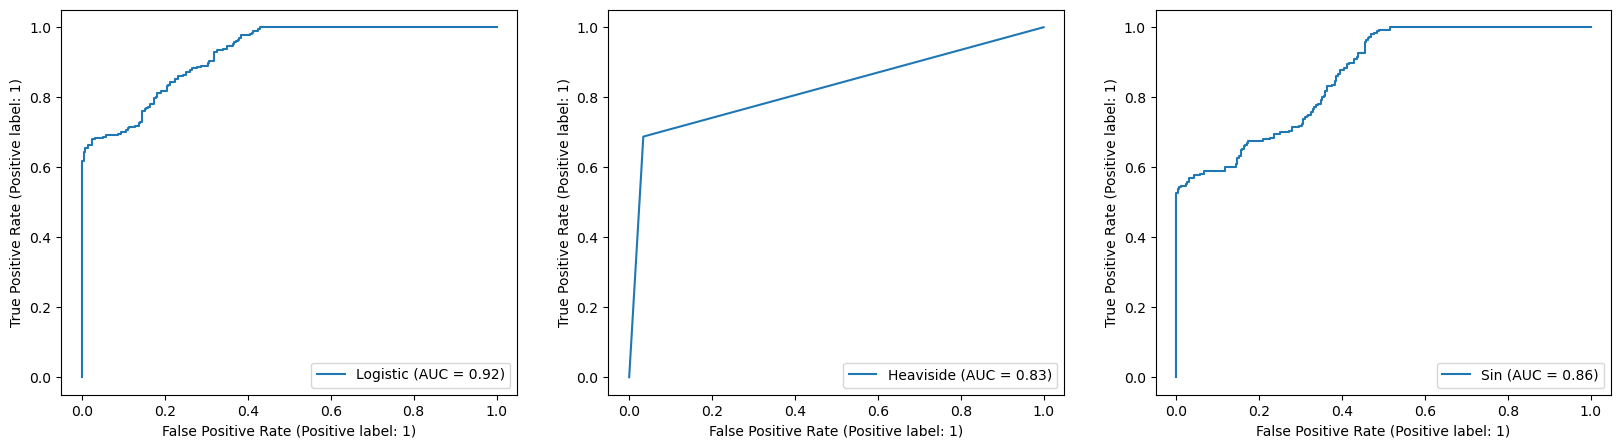

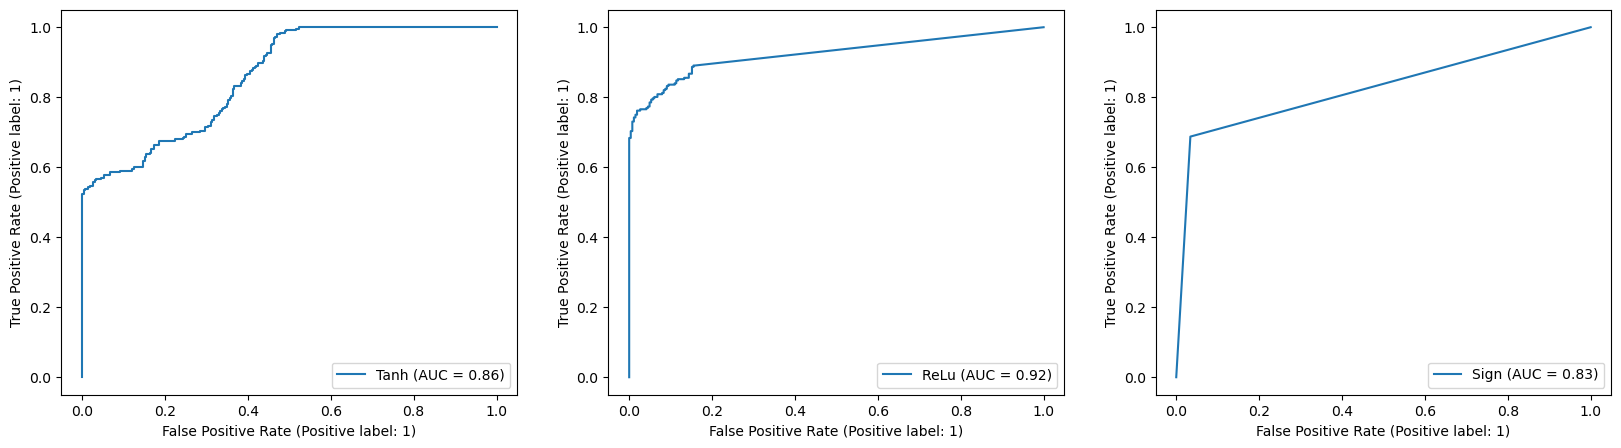

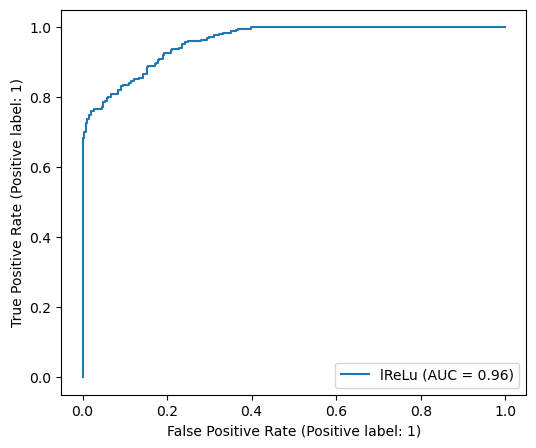

In [22]:
model_logistic, y_pred_logistic, y_scores_logistic = neuron_custom(X_train_M, X_test_M, y_train_M, y_test_M, 'logistic')
model_heaviside, y_pred_heaviside, y_scores_heaviside = neuron_custom(X_train_M, X_test_M, y_train_M, y_test_M, 'heaviside')
model_sin, y_pred_sin, y_scores_sin = neuron_custom(X_train_M, X_test_M, y_train_M, y_test_M, 'sin')
model_tanh, y_pred_tanh, y_scores_tanh = neuron_custom(X_train_M, X_test_M, y_train_M, y_test_M, 'tanh')
model_ReLu, y_pred_ReLu, y_scores_ReLu = neuron_custom(X_train_M, X_test_M, y_train_M, y_test_M, 'ReLu')
model_sign, y_pred_sign, y_scores_sign = neuron_custom(X_train_M, X_test_M, y_train_M, y_test_M, 'sign')
model_lReLu, y_pred_lReLu, y_scores_lReLu = neuron_custom(X_train_M, X_test_M, y_train_M, y_test_M, 'lReLu')

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_class(X_test_M, y_test_M, model_logistic, 'Logistic')
plt.subplot(1, 3, 2)
plot_class(X_test_M, y_test_M, model_heaviside, 'Heaviside')
plt.subplot(1, 3, 3)
plot_class(X_test_M, y_test_M, model_sin, 'Sin')
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_class(X_test_M, y_test_M, model_tanh, 'Tanh')
plt.subplot(1, 3, 2)
plot_class(X_test_M, y_test_M, model_ReLu, 'Heaviside')
plt.subplot(1, 3, 3)
plot_class(X_test_M, y_test_M, model_sign, 'Sign')
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_class(X_test_M, y_test_M, model_lReLu, 'lReLu')

_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_M, y_scores_logistic, name='Logistic', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_M, y_scores_heaviside, name='Heaviside', ax=axs[1])
RocCurveDisplay.from_predictions(y_test_M, y_scores_sin, name='Sin', ax=axs[2])
_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_M, y_scores_tanh, name='Tanh', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_M, y_scores_ReLu, name='ReLu', ax=axs[1])
RocCurveDisplay.from_predictions(y_test_M, y_scores_sign, name='Sign', ax=axs[2])
_, axs = plt.subplots(1, 1, figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test_M, y_scores_lReLu, name='lReLu', ax=axs)

In [109]:
class MNeuronCOS:
    def __init__(self, eta=0.001, num_iterations=100, actv_func = 'logistic', eta_min=0.001, eta_max=2):
        self.eta = eta
        self.NUM_ITERATIONS = num_iterations
        self.theta = None
        self.y_pred_prob = None
        self.EPSILON = 0.01
        self.actv_func = actv_func
        self.eta_min = eta_min
        self.eta_max = eta_max
        

    def fit(self, X, y, batches):
        self.batches = batches
        _, num_features = X.shape
        self.theta = np.zeros(num_features)
        self.eta = [self.eta_min + (self.eta_max - self.eta_min) * (1 + np.cos((n / self.NUM_ITERATIONS) * np.pi)) for n in range(self.NUM_ITERATIONS)]

        X_batches = np.array_split(X, batches)
        y_batches = np.array_split(y, batches)

        for X_b, y_b in zip(X_batches, y_batches):
            self.fit_batch(X_b, y_b)
    
    def fit_batch(self, X, y):
        for i in range(int(self.NUM_ITERATIONS)):
            linear_model = X @ self.theta
            y_predicted = self.activation_function(linear_model)
            epsilon = (y_predicted - y)
            dw = (epsilon * self.derivative_function(linear_model)) @ X
            self.theta -= self.eta[i] * dw
        

    def predict(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.activation_function(linear_model)
        self.y_pred_prob = y_predicted_prob
        # print(f'y_pred: {y_predicted_prob}')
        if self.actv_func in ['sin', 'tanh', 'ReLu', 'lRelu']:
            y_predicted = [1 if i > 0 else 0 for i in y_predicted_prob]
        else:
            y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_prob]
        return np.array(y_predicted)
    
    def decision_function(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.activation_function(linear_model)
        return np.array(y_predicted_prob)

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


    def logistic_activation(self, X):
        return 1 / (1 + np.exp(-X))
    def logistic_deriv(self, X):
        y = self.logistic_activation(X)
        return y * (1-y)
    
    
    def heaviside_activation(self, X):
        return np.where(X >= 0, 1, 0)
    def heaviside_deriv(self, X):
        return 1


    def sin_activation(self,X):
        return np.sin(X)
    def sin_deriv(self, X):
        return np.cos(X)


    def tanh_activation(self, X):
        return np.tanh(X)
    def tanh_deriv(self, X):
        return (1/(np.cosh(X)))**2


    def sign_activation(self, X):
        return np.where(X>=0, 1, -1)
    def sign_deriv(self, X):
        return 1

    
    def ReLu_activation(self, X):
        return np.maximum(0, X)
    def ReLu_deriv(self, X):
        return np.where(X >= 0, 1, 0)

    
    def lReLu_activation(self, X):
        return np.where(X > 0, X, 0.01*X)
    def lReLu_deriv(self, X):
        return np.where(X > 0, 1, 0.01)

    
    def activation_function(self, X):
        if self.actv_func == 'logistic':
            return self.logistic_activation(X)
        
        elif self.actv_func == 'heaviside':
            return self.heaviside_activation(X)
        
        elif self.actv_func == 'sin':
            return self.sin_activation(X)
        
        elif self.actv_func == 'tanh':
            return self.tanh_activation(X)
        
        elif self.actv_func == 'sign':
            return self.sign_activation(X)
        
        elif self.actv_func == 'ReLu':
            return self.ReLu_activation(X)
        
        elif self.actv_func == 'lReLu':
            return self.lReLu_activation(X)
        
        else:
            raise ValueError('Activation not supported')
        
    def derivative_function(self, X):
        if self.actv_func == 'logistic':
            return self.logistic_deriv(X)
        
        elif self.actv_func == 'heaviside':
            return self.heaviside_deriv(X)
        
        elif self.actv_func == 'sin':
            return self.sin_deriv(X)
        
        elif self.actv_func == 'tanh':
            return self.tanh_deriv(X)
        
        elif self.actv_func == 'sign':
            return self.sign_deriv(X)
        
        elif self.actv_func == 'ReLu':
            return self.ReLu_deriv(X)
        
        elif self.actv_func == 'lReLu':
            return self.lReLu_deriv(X)
        
        else:
            raise ValueError('Activation not supported')
        

In [112]:
def neuron_custom_cos(X_train, X_test, y_train, y_test, method, batches):
    model = MNeuronCOS(eta=0.001, num_iterations=100, actv_func=method)
    start = time.time()
    for i in range(50):
        model.fit(X_train, y_train, batches)
    end = time.time()
    timer = (end - start)/50
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return timer, accuracy

In [116]:
batches = [2, 4, 8, 16, 32, 64, 128, 256]
times = []
accuracy = []
for batch in batches:
    time_, acc = neuron_custom_cos(X_syn_train, X_syn_test, y_syn_train, y_syn_test, 'logistic', batch)
    times.append(time_)
    accuracy.append(acc)

C:\Users\Dominik\AppData\Local\Temp\ipykernel_15196\891983865.py:57: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
C:\Users\Dominik\AppData\Local\Temp\ipykernel_15196\891983865.py:57: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


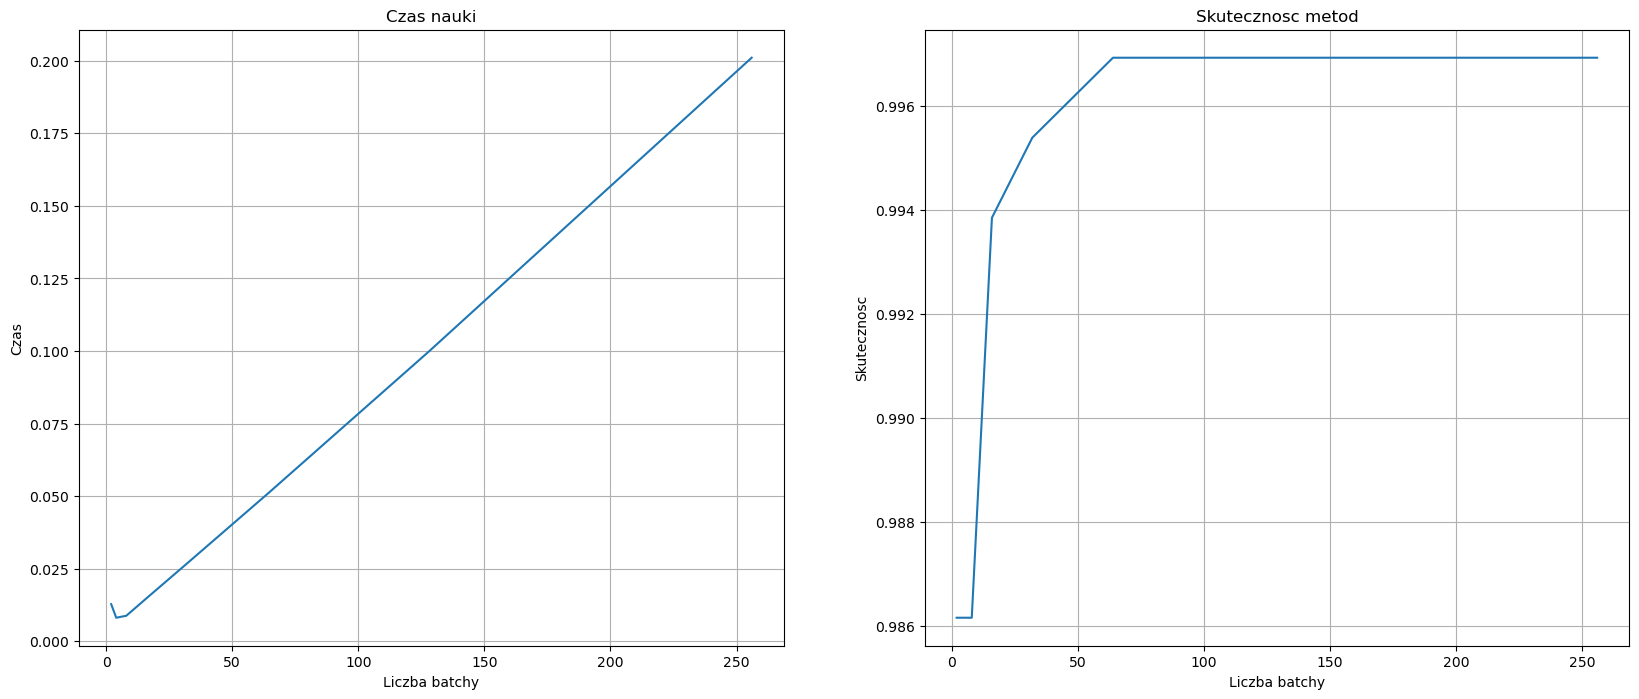

In [117]:
_, axs = plt.subplots(1, 2, figsize=(20, 8))
ax=axs[0]
ax.plot(batches, times)
ax.set_title('Czas nauki')
ax.set_xlabel('Liczba batchy')
ax.set_ylabel('Czas')
ax.grid()

ax=axs[1]
ax.plot(batches, accuracy)
ax.set_title('Skutecznosc metod')
ax.set_xlabel('Liczba batchy')
ax.set_ylabel('Skutecznosc')
ax.grid()